# Día 08 - Agrupaciones Avanzadas y Análisis Temporal 📅⚙️

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Crear DataFrame con fechas

In [11]:
data = {
    'producto': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'D'],
    'precio': [100, 200, 100, 300, 200, 100, 300, 300, 500],
    'cantidad': [2, 1, 3, 1, 2, 2, 1, 1, 2],
    'fecha_venta': pd.date_range(start='2024-01-01', periods=9, freq='D')
}
ventas = pd.DataFrame(data)
ventas['ingreso'] = ventas['precio'] * ventas['cantidad']
ventas

,producto,precio,cantidad,fecha_venta,ingreso
0,A,100,2,2024-01-01,200
1,B,200,1,2024-01-02,200
2,A,100,3,2024-01-03,300
3,C,300,1,2024-01-04,300
4,B,200,2,2024-01-05,400
5,A,100,2,2024-01-06,200
6,C,300,1,2024-01-07,300
7,C,300,1,2024-01-08,300
8,D,500,2,2024-01-09,1000


### 2. Agrupación por día

In [12]:
ingresos_por_dia = ventas.groupby('fecha_venta')["ingreso"].sum().reset_index()
ingresos_por_dia

,fecha_venta,ingreso
0,2024-01-01,200
1,2024-01-02,200
2,2024-01-03,300
3,2024-01-04,300
4,2024-01-05,400
5,2024-01-06,200
6,2024-01-07,300
7,2024-01-08,300
8,2024-01-09,1000


### 3. Extraer información temporal

In [28]:
ventas['dia_semana'] = ventas['fecha_venta'].dt.day_name()
ventas['mes'] = ventas['fecha_venta'].dt.month_name()
ventas['año'] = ventas['fecha_venta'].dt.year
ventas

,producto,precio,cantidad,fecha_venta,ingreso,dia_semana,mes,año
0,A,100,2,2024-01-01,200,Monday,January,2024
1,B,200,1,2024-01-02,200,Tuesday,January,2024
2,A,100,3,2024-01-03,300,Wednesday,January,2024
3,C,300,1,2024-01-04,300,Thursday,January,2024
4,B,200,2,2024-01-05,400,Friday,January,2024
5,A,100,2,2024-01-06,200,Saturday,January,2024
6,C,300,1,2024-01-07,300,Sunday,January,2024
7,C,300,1,2024-01-08,300,Monday,January,2024
8,D,500,2,2024-01-09,1000,Tuesday,January,2024


### 4. Agrupación por mes y producto

In [15]:
resumen_mes_producto = ventas.groupby(['mes', 'producto'])['ingreso'].sum().reset_index()
resumen_mes_producto

,mes,producto,ingreso
0,January,A,700
1,January,B,600
2,January,C,900
3,January,D,1000


### 5. Visualización de tendencia de ingresos

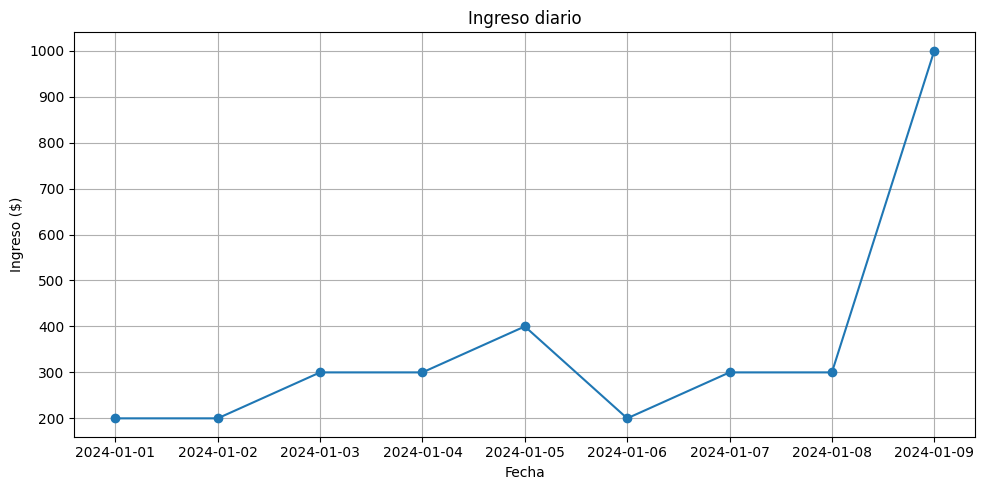

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(ingresos_por_dia['fecha_venta'], ingresos_por_dia['ingreso'], marker='o')
plt.title("Ingreso diario")
plt.xlabel("Fecha")
plt.ylabel("Ingreso ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

🧪 Mini Práctica – Análisis de ventas semanales por producto
🎯 Objetivo:
Analizar el comportamiento de ingresos semanales de distintos productos y visualizar las diferencias.

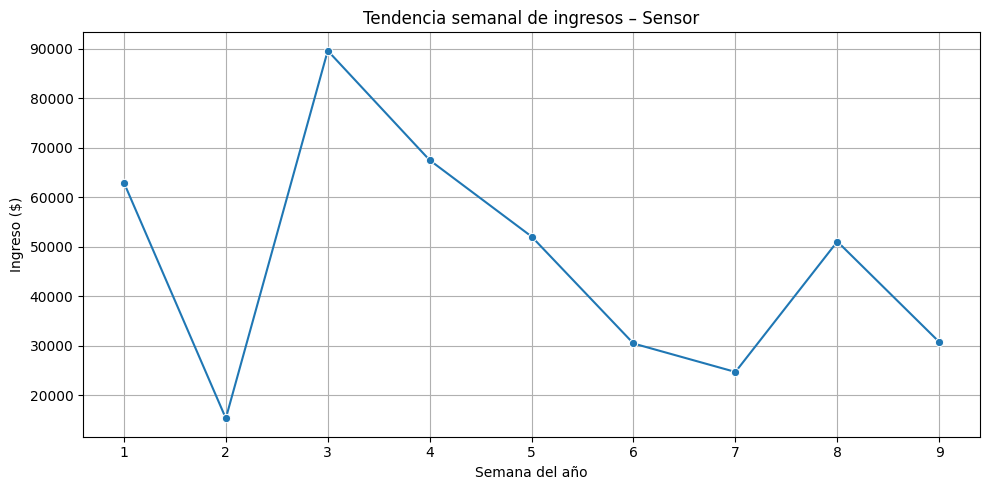

,año,semana,producto,ingreso
23,2024,7,Actuador,9147
13,2024,4,Cámara,9224
17,2024,5,PLC,9680
7,2024,2,Sensor,15338


In [33]:
import pandas as pd
import numpy as np

np.random.seed(42)

productos = ['Sensor', 'Cámara', 'PLC', 'Actuador']
fechas = pd.date_range(start='2024-01-01', periods=60, freq='D')

df = pd.DataFrame({
    'fecha': np.random.choice(fechas, 100),
    'producto': np.random.choice(productos, 100),
    'precio': np.random.randint(1000, 10000, size=100),
    'cantidad': np.random.randint(1, 5, size=100)
})

df['ingreso'] = df['precio'] * df['cantidad']
df.head()

df['semana'] = df['fecha'].dt.isocalendar().week
df['año'] = df['fecha'].dt.year
df.head()

ingresos_semanales = df.groupby(['año', 'semana', 'producto'])['ingreso'].sum().reset_index()
ingresos_semanales.head()

producto_objetivo = 'Sensor'

df_sensor = ingresos_semanales[ingresos_semanales['producto'] == producto_objetivo]

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sensor, x='semana', y='ingreso', marker='o')
plt.title(f'Tendencia semanal de ingresos – {producto_objetivo}')
plt.xlabel('Semana del año')
plt.ylabel('Ingreso ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

#🚀 Desafío extra (opcional):
"¿Qué semana fue la mejor en ventas para cada producto?"
df_top = ingresos_semanales.loc[ingresos_semanales.groupby('producto')['ingreso'].idxmax()]
df_top.head()

df_min = ingresos_semanales.loc[ingresos_semanales.groupby('producto')['ingreso'].idxmin()]
df_min.head()